**Visualisasikan running time**  
(5 poin) Untuk masing-masing program, buatlah sebuah eksperimen dengan memberikan input
banyaknya cakram n = 0; 1; 2; : : : ; 30 (jika program Anda berjalan cukup cepat, berikan masukan
hingga n = 50 atau lebih), dan uji performance-nya dengan mencatatkan running time untuk setiap
nilai n yang diinput. Visualisasikan running time masing-masing program dengan menyajikan
grafik garis keduanya dalam satu bingkai, untuk membandingkan performance kedua program
tersebut.

In [1]:
def printTower(disk, t1, t2, t3):
    towers = list()
    towers.append(t1)
    towers.append(t2)
    towers.append(t3)

    print("moving :",disk )

    for tower in towers:
        if tower[1] == "source":
            print(tower[1], " : ", tower[0])
            break
    for tower in towers:
        if tower[1] == "helper":
            print(tower[1], " : ", tower[0])
            break
    for tower in towers:
        if tower[1] == "target":
            print(tower[1], " : ", tower[0])
            break


In [7]:

def recHanoi(n, source, helper, target):
    if n > 0:
        recHanoi(n - 1, source, target, helper)
        if source[0]:
            disk = source[0].pop()
            target[0].append(disk)
            # printTower(n, source, helper, target)
        recHanoi(n - 1, helper, source, target)
        


In [11]:
def recHanoi2(n, source, helper, target):

    if n > 0:
        recHanoi2(n - 1, source, target, helper)
        if source[0]:
            disk = source[0].pop()
            # print("Pindahkan cakram " + str(disk) + " dari " + source[1] + " ke " + target[1])
            target[0].append(disk)
        recHanoi2(n - 1, helper, source, target)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
import math
import random

plt.rcParams['figure.figsize'] = [10, 6] # set size of plot

In [8]:

ns = np.linspace(0, 15, dtype=int)

t = timeit.Timer("recHanoi(len(source[0]),source,helper,target)")
ts = [timeit.timeit('recHanoi(n, source, helper, target)', 
                  setup='n={}; source = (list(range({})), "source") ;helper = (list(), "helper");target = (list(), "target") '.format(n,n),
                  globals=globals(),
                  number=15)
      for n in ns]  


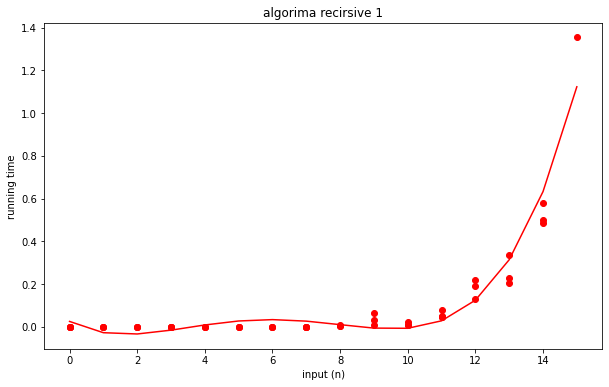

In [17]:
plt.plot(ns, ts, 'or')
degree = 4
coeffs = np.polyfit(ns, ts, degree)
p = np.poly1d(coeffs)
plt.xlabel('input (n)')
plt.ylabel('running time')
plt.title('algorima recirsive 1') 
plt.plot(ns, [p(n) for n in ns], '-r')



In [12]:

ns = np.linspace(0, 15, dtype=int)


ts2 = [timeit.timeit('recHanoi2(n, source, helper, target)', 
                  setup='n={}; source = (list(range({})), "source") ;helper = (list(), "helper");target = (list(), "target") '.format(n,n),
                  globals=globals(),
                  number=15)
      for n in ns]  


Text(0, 0.5, 'running time')

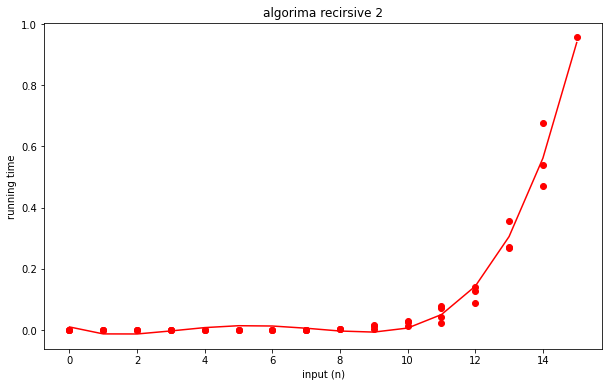

In [16]:
plt.plot(ns, ts2, 'or')
degree = 4
coeffs = np.polyfit(ns, ts2, degree)
p = np.poly1d(coeffs)
plt.plot(ns, [p(n) for n in ns], '-r')
plt.xlabel('input (n)')
plt.title('algorima recirsive 2') 
plt.ylabel('running time') 
